<a href="https://colab.research.google.com/github/pavansai26/UMAP-VS-HDBSCAN-CLUSTERING/blob/master/UMAP_VS_HDBSCAN_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
sns.set(context='notebook',rc={'figure.figsize':(12,10)})
import umap
from sklearn.metrics import adjusted_rand_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install hdbscan

     |████████████████████████████████| 4.7MB 3.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301797 sha256=52de00ed3b5e921c553ffc53cb0dabdaf54ec3b0e12886d87b0a4096495b5652
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [ ]:
data_x=digits.data
data_y=digits.target

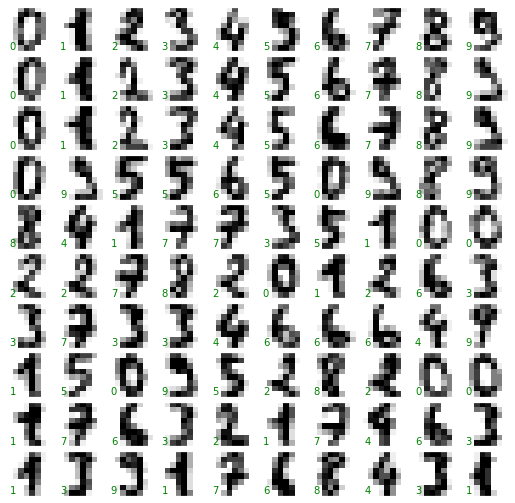

In [ ]:
fig,ax =plt.subplots(10,10,figsize=(9,9),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
for i,axes in enumerate(ax.flat):
  axes.imshow(digits.images[i],cmap='binary')
  axes.text(0.05,0.05,str(digits.target[i]),transform=axes.transAxes,color='green')

In [ ]:
start = datetime.datetime.now()
standard_embedding=umap.UMAP(random_state=42).fit_transform(data_x)
end = datetime.datetime.now()
timetaken = end-start
print(timetaken)

0:00:11.619931


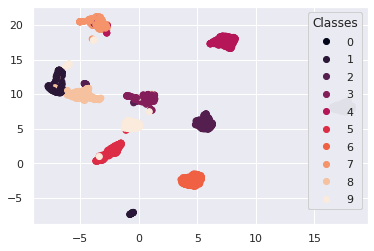

In [ ]:
fig, ax = plt.subplots()



scatter = ax.scatter(standard_embedding[:,0],standard_embedding[:,1], c=data_y, )
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
ax.add_artist(legend1)


In [ ]:
hdbscan_labels=hdbscan.HDBSCAN().fit_predict(data_x)

In [ ]:
hdbscan_labels

array([ 2, 19, -1, ..., -1, -1, -1])

In [ ]:
clustered=(hdbscan_labels >= 0)

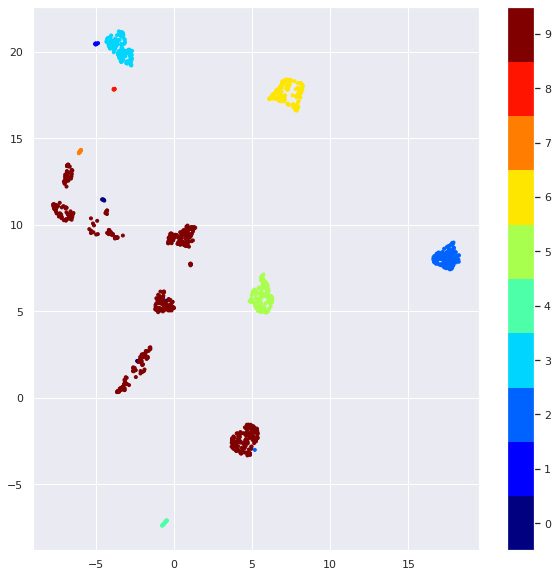

In [ ]:
plt.figure(figsize=(10,10))
vis_x = standard_embedding[clustered,0]
vis_y = standard_embedding[clustered,1]
plt.scatter(vis_x, vis_y, c=hdbscan_labels[clustered], cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [ ]:
clustered=(hdbscan_labels >=0)
(adjusted_rand_score(data_y[clustered],hdbscan_labels[clustered]))

0.9040845016096042

In [ ]:
(adjusted_rand_score(data_y,hdbscan_labels))

0.4869574965473278